In [3]:
# サポートベクトルマシンの実装
from sklearn import datasets
from sklearn.cross_validation import train_test_split
import numpy as np

iris=datasets.load_iris()
X=iris.data[:,[2,3]]

In [4]:
X=X[0:100] # 先頭から100個のデータを抽出
y=iris.target[0:100] # 特徴量も同じく先頭から100個の目的変数を抽出
print(X.shape)
print(y)

(100, 2)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(70, 2)
(30, 2)
(70,)
(30,)


In [7]:
# ライブラリの読み込み
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
# 正答率計算用のモジュールの読み込み
from sklearn.metrics import accuracy_score
# 予測結果を変数に代入
y_predicted = svm.predict(X_test)
# 正答率を算出
print('正答率', accuracy_score(y_test, y_predicted))

正答率 1.0


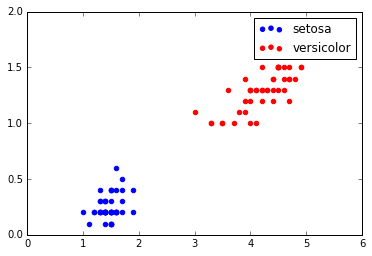

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X[:50, 0],X[:50,1], color='blue',marker='o', label='setosa')
plt.scatter(X[50:100,0], X[50:100,1],color='red',marker='o',label='versicolor')
plt.legend() # 右上の青と赤の説明を表示するメソッド

In [23]:
X_min,X_max=X[:,0].min()-1, X[:,0].max()+1
y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
X_axis,y_axis=np.meshgrid(np.arange(X_min,X_max,0.02),
                         np.arange(y_min,y_max,0.02))
print(X_axis.shape)
print(y_axis.shape)
data_num=X_axis.shape[0]*X_axis.shape[1]
print(data_num)
grid_points=np.concatenate((X_axis.reshape(data_num,1),y_axis.reshape(data_num,1)),axis=1)
print(grid_points.shape)

(185, 305)
(185, 305)
56425
(56425, 2)


In [25]:
class_labels = svm.predict(grid_points)
class_labels = class_labels.reshape(x_axis.shape)
print(class_labels.shape)

(185, 305)


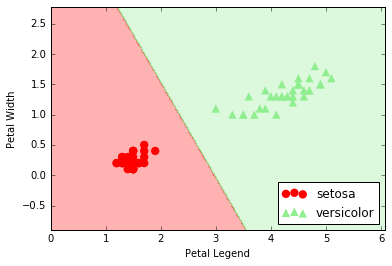

In [37]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

markers = ('o','^')

colors=('red','lightgreen')

cmap=ListedColormap(colors)

labels=('setosa','versicolor')

for i, n in enumerate(np.unique(y)):
    plt.scatter(x=X_train[y_train==n,0],
               y=X_train[y_train==n,1],
               c=cmap(i),
               marker=markers[i],
               s=70,
               edgecolor='',
               label=labels[i])
    
plt.legend(loc='lower right')

plt.xlim(x_axis.min(),x_axis.max())
plt.ylim(y_axis.min(),y_axis.max())

# contourfメソッドを使って領域を塗りつぶす
plt.contourf(x_axis, y_axis, class_labels, alpha=0.3, cmap=cmap)

plt.xlabel('Petal Legend')
plt.ylabel('Petal Width')
plt.show()